<a href="https://colab.research.google.com/github/tghose21/DS_1002_Repository/blob/main/DS_1002_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv('/content/ftx-2021-01-01--2023-12-31 (3).csv')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [3]:
# Display number of rows
rows = len(df)
print("There are " + str(rows) + " rows in the dataset. ")

# Display number of columns
columns = len(df.columns)
print("There is " + str(columns) + " columns in the dataset. ")

There are 741 rows in the dataset. 
There is 1 columns in the dataset. 


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [17]:
# Resolve any empty values or duplicate rows.
df = df.dropna()
df = df.drop_duplicates()

# Drop the following columns and save the dataframe: timeOpen, timeClose, timeHigh, timeLow, marketCap
# I cannot escape this error, but it is printing out alright for #4
df[['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']] = df['timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'].str.split(';', expand=True)
df = df.drop(columns=['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'])

KeyError: 'timeOpen;timeClose;timeHigh;timeLow;open;high;low;close;volume;marketCap;timestamp'

Now display the first 10 rows of the cleaned dataset.

In [18]:
print(df.head(10))

           open          high           low         close       volume  \
0  0.8389684425   0.853501666  0.8352262088  0.8426884241   3001502.06   
1   0.860193073   0.864751879  0.8266428992  0.8390481756   3608615.07   
2  0.8857226476  0.8871175386  0.8430286751  0.8602311608   3766979.57   
3  0.9211619958  0.9257015248  0.8698420242  0.8860908765   4192949.85   
4  0.9311378574  0.9554017418  0.9164143458  0.9236676658   4574953.05   
5  0.8945671492  1.0111825828  0.8936523976  0.9306958402   7065306.21   
6  0.9244321852  0.9355165843  0.8943699316   0.894656646   2577834.83   
7  0.9575050529  0.9756714327  0.9210848028  0.9244326068   5055004.16   
8  1.0271327165  1.0382822479   0.948058351  0.9570063953  17088962.94   
9  0.8739733875  1.1271983252  0.8356250943  1.0271616025  22418556.51   

                    timestamp  
0  "2022-12-31T23:59:59.999Z"  
1  "2022-12-30T23:59:59.999Z"  
2  "2022-12-29T23:59:59.999Z"  
3  "2022-12-28T23:59:59.999Z"  
4  "2022-12-27T23:59:59.9

## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [19]:
# Add new column named ["close_change"] using difference of close
df["close"] = df["close"].astype(float)
df["close_change"] = df["close"].diff()

## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [20]:
# Identify top 10 days of positive growth
topTen = df.nlargest(10, 'close_change')
tabledf = topTen[['close_change', 'timestamp']]
print(tabledf)

     close_change                   timestamp
56      16.623292  "2022-11-07T23:59:59.999Z"
468     14.497738  "2021-09-16T23:59:59.999Z"
598     14.017812  "2021-05-18T23:59:59.999Z"
478      9.506381  "2021-09-15T23:59:59.999Z"
473      8.315742  "2021-09-19T23:59:59.999Z"
484      6.929033  "2021-09-09T23:59:59.999Z"
350      6.770635  "2022-01-20T23:59:59.999Z"
594      6.228516  "2021-05-22T23:59:59.999Z"
481      5.201864  "2021-09-12T23:59:59.999Z"
605      5.154806  "2021-05-11T23:59:59.999Z"


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [21]:
# Rates of Change column
df['rate_change'] = df['close_change'].pct_change()

## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [24]:
topTen = df.nlargest(10, "rate_change")
tabledf = topTen[['rate_change', 'timestamp']]
print(tabledf)

print()

bottomTen = df.nsmallest(10, "rate_change")
tabledf2 = bottomTen[['rate_change', 'timestamp']]
print(tabledf2)

     rate_change                   timestamp
110   273.028254  "2022-09-14T23:59:59.999Z"
516   216.674634  "2021-08-08T23:59:59.999Z"
182   178.229185  "2022-07-06T23:59:59.999Z"
369    97.180950  "2021-12-31T23:59:59.999Z"
216    58.778546  "2022-06-02T23:59:59.999Z"
375    44.823230  "2021-12-25T23:59:59.999Z"
661    40.503914  "2021-03-21T23:59:59.999Z"
51     40.353207  "2022-11-12T23:59:59.999Z"
87     38.199348  "2022-10-07T23:59:59.999Z"
162    22.884676  "2022-07-24T23:59:59.999Z"

     rate_change                   timestamp
135 -1146.635171  "2022-08-20T23:59:59.999Z"
240  -370.048919  "2022-05-10T23:59:59.999Z"
446  -166.691725  "2021-10-15T23:59:59.999Z"
193   -83.605800  "2022-06-25T23:59:59.999Z"
306   -79.028500  "2022-03-05T23:59:59.999Z"
593   -38.243649  "2021-05-23T23:59:59.999Z"
89    -31.027618  "2022-10-05T23:59:59.999Z"
24    -27.735806  "2022-12-09T23:59:59.999Z"
302   -23.669659  "2022-03-09T23:59:59.999Z"
725   -20.668008  "2021-01-17T23:59:59.999Z"


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

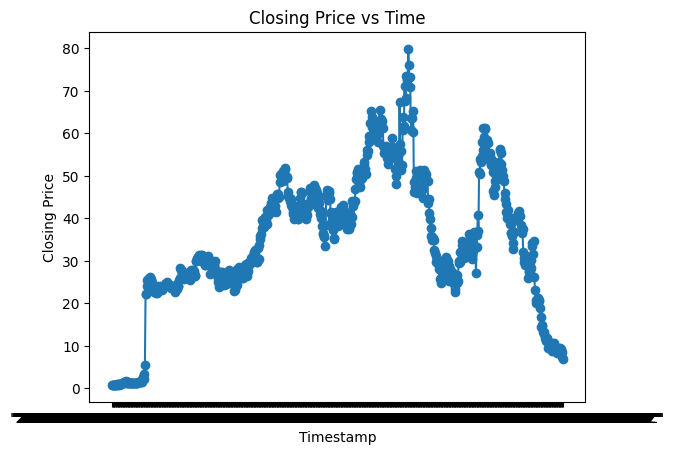

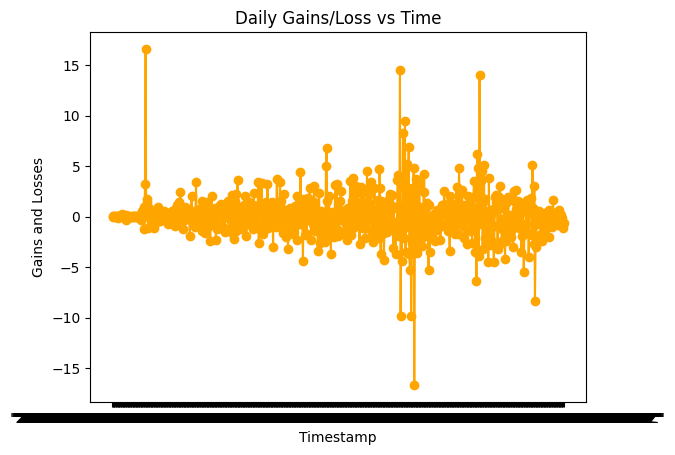

In [36]:
# Plot of daily closing price
plt.plot(df['timestamp'], df['close'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('Closing Price vs Time')
plt.show()

# Plot of daily gains/losses
plt.plot(df['timestamp'], df['close_change'], marker='o', linestyle='-', color = 'orange')
plt.xlabel('Timestamp')
plt.ylabel('Gains and Losses')
plt.title('Daily Gains/Loss vs Time')
plt.show()

# I am not sure why there are not units on the x axis

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

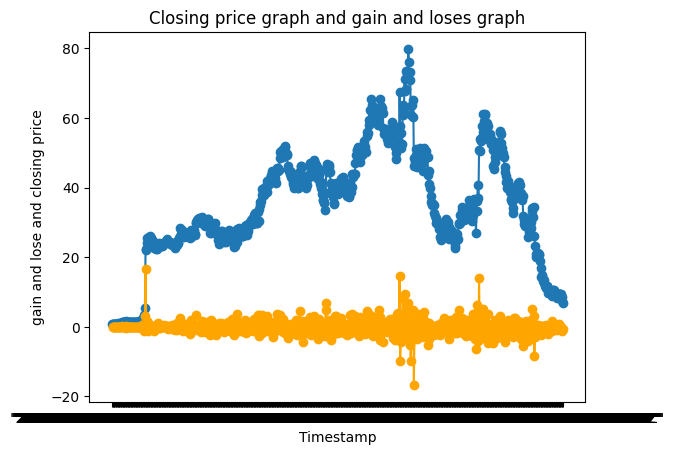

In [35]:
# I am unable to add a legend
plt.plot(df['timestamp'], df['close'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Closing Price')
plt.title('Closing Price and Daily Gains/Loss Graph')


plt.plot(df['timestamp'], df['close_change'], marker='o', linestyle='-', color = 'orange')
plt.xlabel('Timestamp')
plt.ylabel('gain and lose and closing price')
plt.title('Closing price graph and gain and loses graph')

plt.show()